# 回帰モデル

本記事はStatsmodelsの線形回帰のサンプル([Linear Regression](https://www.statsmodels.org/stable/regression.html))を翻訳し、加筆したものだ。サンプルは

|日本語|statsmodels|
|:-:|:-:|
|最小二乗法|[OLS](https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html)|
|加重最小二乗法|[WLS](https://www.statsmodels.org/stable/examples/notebooks/generated/wls.html)|
|一般化最小二乗法|[GLS](https://www.statsmodels.org/stable/examples/notebooks/generated/gls.html)|
|再帰的最小二乗法|[Recursive LS](https://www.statsmodels.org/stable/examples/notebooks/generated/recursive_ls.html)|

という基本的な構造をもっている。これを１つの記事として投稿していたのだが加筆を加えていくうちに長くなったので３分割することにした。


続は過去の勉強会で必要と思ったところをメモ書きした。AIC,推定の問題、内生変数と外生変数を取り扱った。

続々はsampleの翻訳、追加解説 
[WLS](https://www.statsmodels.org/stable/examples/notebooks/generated/wls.html)
[GLS](https://www.statsmodels.org/stable/examples/notebooks/generated/gls.html)
[recurcive LS](https://www.statsmodels.org/stable/examples/notebooks/generated/recursive_ls.html)

-------
StatsmodelsはPythonというプログラミング言語上で動く統計解析ソフトである。statsmodelsのサンプルを動かすにはPCにPythonがインストールされている必要がある。まだインストールされていない方は[Jupyter notebookのインストール](https://qiita.com/innovation1005/items/2f433d6d859f075033a7)を参照。Jupyter notebookはstatsmodelsを動かすのに大変便利である。

- 線形回帰モデル

statsmodelsでは線形回帰モデル

$$y=f(x_i)+e=\beta_0+\beta_1 x_1 +,\cdots,+ e $$

$$y_i=f(X)+e=\beta_0+\beta_1 x_{1i} +,\cdots,+ e_i $$

の切片($\beta_0$)と回帰係数($\beta_i$)を

    - 最小二乗法|OLS|
    - 加重最小二乗法|WLS|
    - 一般化最小二乗法|GLS|
    - 再帰的最小二乗法|Recursive LS|

という4つの方法により推定する。$x$は説明変数、$e$は誤差である。$y$は被説明変数で、$x$の線形結合としてモデル化される。最小二乗法によって得られるモデルがもっともらしくあるためには、誤差には

- 偏りがない。(E$[e_i]=0$)
- 分散は既知で一定である。(Var$[e_i]=\sigma^2$)
- 共分散は0である。(Cov$[e_i,e_j]=0, i\ne j$)
- 正規分布にしたがう。統計的推測のために仮定される。

という前提条件が課される。GLSは誤差の分散が一定ではない分散不均一性、誤差同士が相関をもつ自己相関をもつ誤差に対処できるモデルで、WLSは分散不均一性を扱っていて、Recursive LSは自己相関をもつ誤差を扱っている。これらのモデルでは条件を満たせない誤差の問題をいろいろと調整をして、これらの条件を成り立たせることで回帰係数を推定している。

線形回帰というときには
1) パラメータに対して線形
という条件が課される。また、x(独立変数、説明変数)については
a) 確率変数ではなく確定した値(所与の値)
b) 確率変数
の場合に分けられ、確率変数の場合にはxは誤差項と独立である必要がある。

$y$の分布を指数分布族として指定して、残差を任意の分布としたものとして[一般化線形モデル](https://qiita.com/innovation1005/items/8b8a2ca2176134692155)がある。これをさらに発展させたものとして

- [一般化推定方程式](https://qiita.com/innovation1005/items/42a64213ac725719c785)
- 一般化混合モデル
- [一般化加法モデル](https://qiita.com/innovation1005/items/cc3c4f7d17f9f2ddd2f5)

などがある。線形回帰ではOLSを用いるが、一般化線形モデルとその発展形では最尤法、またはそれに準じた方法を用いて回帰係数の推定を行う。

また、時間の経過とともに記録したデータを時系列データという。時系列データを扱うときには従属変数yと独立変数ｘがともに確率変数であるときがある。回帰モデルが独立変数の現在だけではなく、過去のデータも含むとき分布ラグモデルという。説明変数が従属変数の過去の値からなるとき、分布ラグモデルに従属変数の過去の値を含むときには自己回帰モデル、または動学モデル(dynamic model)という。

同じ時点の異なるデータを集めたものをクロスデータとよぶ。このクロスデータを時系列データとしたものがパネルデータである。このようなデータを扱うのがパネルデータ分析である。

モデルがいくつかの回帰モデルからなるときには同時方程式モデルという。需要サイドのモデルと供給サイドのモデルと、それらの均衡を表現するモデルなどの場合である。また、このような問題は[ベクトル自己回帰モデル](https://qiita.com/innovation1005/items/b5333a939c0341b46ba9)または[ベクトル誤差修正モデル](https://qiita.com/innovation1005/items/d53d9ba4f9e8ee1832c6)で扱うこともできる。

時系列分析を扱うときにはその原系列がランダムウォークであるかどうかを判断する必要がる。ランダムウォークであれば1次の和分という。複数の1次の和分過程の線形結合が0次の和分過程であれば、それを共和分と呼ぶ。トレンドをもつ時系列の分析に役に立つ。[ベクトル誤差修正モデル](https://qiita.com/innovation1005/items/d53d9ba4f9e8ee1832c6)などを用いて問題に取り組む。気を付ける必要があるのは共和分の関係にある確率変数が作るトレンドは確率的トレンドであることである。

# 最小二乗法による推定
## 人工的に生成したデータでモデルを確認

$X$を説明変数、$y$を非説明変数とすると
$X=\beta_0+\beta_1 x$
とし
$y=X+e$
とする。$\beta$は係数で$e$はノイズである。

$\beta_0=1,\beta_1=0.1$としてとして人工データを生成し、そのデータを最小二乗法を用いて当てはめ、$\beta$を推定するという問題に取り組む。このようなアプローチは何か新しいモデルを学ぶときにはいつでも有効であり、学習の効率も良いと考える。

別に回帰分析を勉強するのは初めてではないので、頭の中にはいろいろな思いがある。それはどの程度役に立つのだろうかという疑問である。この例ではノイズは標準正規分布にしたがうとする。

初期化をする。

In [1]:
from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(9876789)

つぎに人工データを生成する。この人工データの作り方であるが、Xはlinspaceを用いて作る。これは説明変数が確定した値であることを示している。また、y_trueも確定的な値である。確率変数になっているのはｙであり、これはy_trueにノイズを加えて確率変数にしている。

In [2]:
nsample = 100
x = np.linspace(0, 10, nsample)
X = sm.add_constant(x)
beta = np.array([1, 0.1])
y_true=np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e

# Fit and summary:
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     2.931
Date:                Tue, 20 Jun 2023   Prob (F-statistic):             0.0901
Time:                        12:03:53   Log-Likelihood:                -146.79
No. Observations:                 100   AIC:                             297.6
Df Residuals:                      98   BIC:                             302.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1732      0.211      5.571      0.0

サマリーレポートのもっとも上の二重線の下はデータに関する情報と推定したモデルの特性を示す情報が表示されている。
二番目の二重線から下には回帰係数に関する情報が表示されている。三番目の二重線の下には誤差項に関する情報が示されている。ここでいう誤差は
$y=E(y|x_i)+\epsilon$
の$\epsilon$のことであり、$E(y|x_i)$は推定された回帰係数を用いて得た$y$の期待値である。
結果をサマリーレポートとは別に出力することもできる。

Parameters:  [1.17316847 0.06228625]
R2:  0.029038651902007495


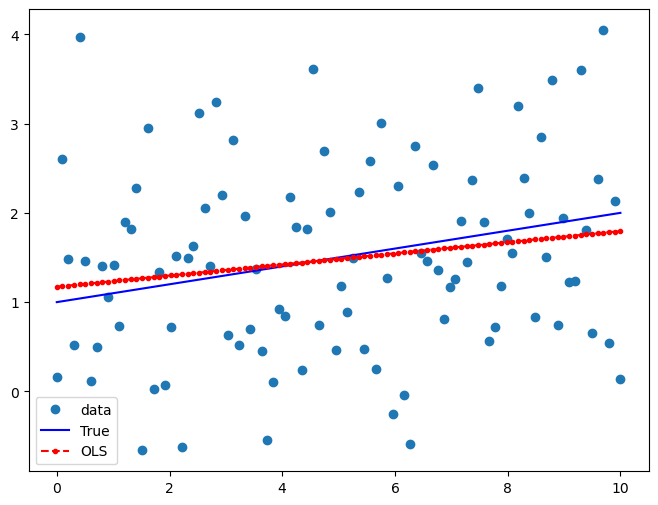

In [3]:
print('Parameters: ', res.params)
print('R2: ', res.rsquared)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.legend(loc='best');

これぞ線形回帰という結果が得られた。線形の意味の通り、直線がありその周りを観測値がうまく散らばっている。

ついでに被説明変数の頻度図も描いてみよう。

(array([ 5.,  9., 16.,  9., 21., 14., 11.,  6.,  5.,  4.]),
 array([-0.65946391, -0.18898793,  0.28148805,  0.75196404,  1.22244002,
         1.692916  ,  2.16339198,  2.63386796,  3.10434395,  3.57481993,
         4.04529591]),
 <BarContainer object of 10 artists>)

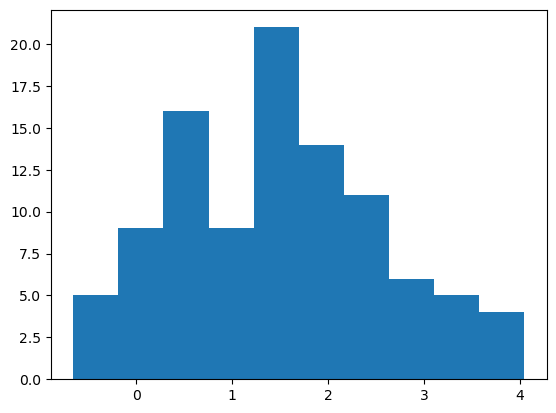

In [4]:
plt.hist(y)

(array([[  0., 100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.]]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 2 BarContainer objects>)

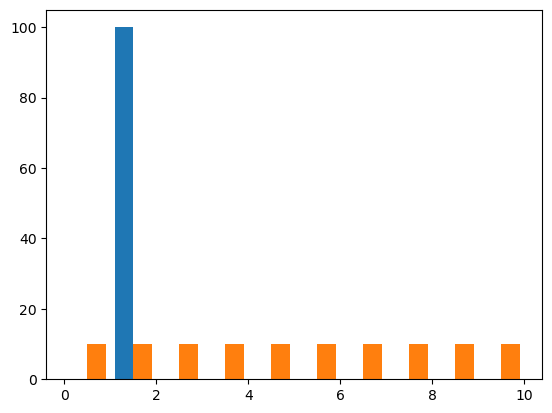

In [5]:
plt.hist(X)

なるほど。青が切片で橙が説明変数である。

誤差についても見てみよう。

(array([ 5.,  8., 16., 15., 22., 14.,  7.,  7.,  5.,  1.]),
 array([-2.15768251, -1.66427675, -1.17087099, -0.67746523, -0.18405946,
         0.3093463 ,  0.80275206,  1.29615782,  1.78956358,  2.28296934,
         2.77637511]),
 <BarContainer object of 10 artists>)

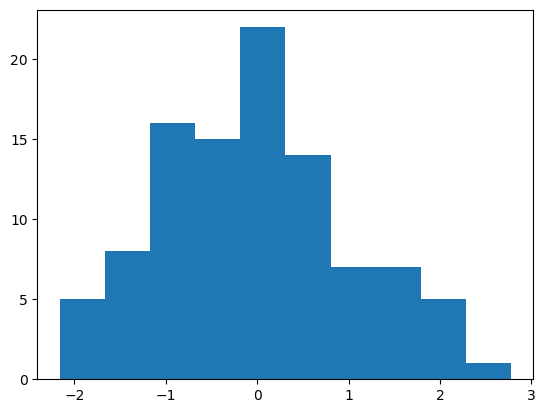

In [6]:
plt.hist(res.resid)

# 線形の意味について
## パラメータについて線形

こんどは説明変数と被説明変数の間の関係が非線形である場合について試してみよう。$X$を
$X=\beta_0+\beta_1 x + \beta_2 x^2$
とし、
$y=X+e$
とする。$\beta$は係数で$e$はノイズである。$\beta_0=1,\beta_1=0.1,\beta_2=0.1$として人工的にデータを生成し、そのデータについて最小二乗法を用いて$\beta$の推定を行う。eは正規乱数。

In [7]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 0.1])
e = np.random.uniform(size=nsample)
X = sm.add_constant(X)
y = np.dot(X, beta) + e-0.5

# Fit and summary:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     5992.
Date:                Tue, 20 Jun 2023   Prob (F-statistic):          2.39e-102
Time:                        12:03:53   Log-Likelihood:                -20.592
No. Observations:                 100   AIC:                             47.18
Df Residuals:                      97   BIC:                             55.00
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1004      0.089     12.395      0.0

条件数(Cond.No.)も144は大きく出ている。$p$値はノイズの生成に乱数を使っている影響で、PCによって値は結構ばらつく。つぎに乱数を一様分布として試してみよう。乱数の特性により$\beta$等の値がどの程度影響を受けるかを見てみたい。


In [8]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 0.01])
e = np.random.uniform(size=nsample)
X = sm.add_constant(X)
y_true=np.dot(X, beta) 
y =y_true + e-0.5
# Fit and summary:
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     213.5
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           2.94e-36
Time:                        12:03:53   Log-Likelihood:                -13.200
No. Observations:                 100   AIC:                             32.40
Df Residuals:                      97   BIC:                             40.22
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8960      0.082     10.866      0.0

結果はほぼ同じである。

先ほどと同じように結果をグラフで表してみる。

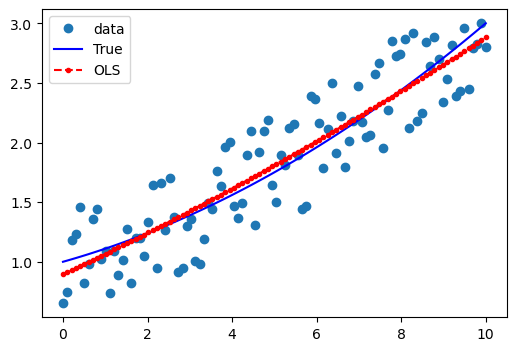

In [9]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.legend(loc='best');

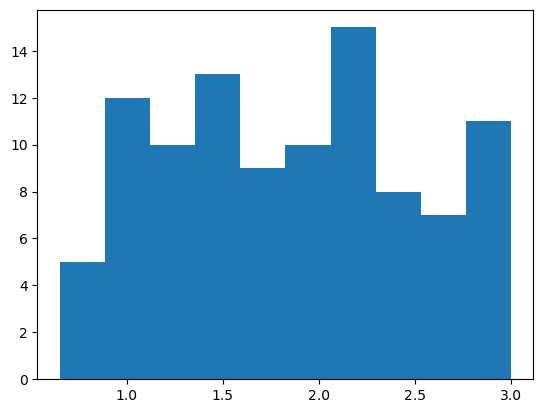

In [10]:
plt.hist(y)
plt.show()

よく'原因と結果が直線で表せる関係でないと線形回帰は使えない'という記述を見る。しかし、この説明だと最初は正しく理解していてもあるときから違う理解に代わってしまうことがよくある。パラメータについて線形とか変数について線形とかいう言い方もされる。$y=\beta_0+\beta_1 x^2$は線形の関数ではない。非線形だ。$x$について非線形だ。$x$の2乗を含むからである。ところがこれをパラメータの立場から見ると線形である。つまり、これは線形回帰モデルで回帰係数を推定できる対象となる。すでに見たとおりだ。しかし、統計の専門家は別として、これがややこしく、そのうちに理解が逆さになってしまうのだ。

statsmodelsのリファレンスにあるつぎの例は驚くほど良い例だと思う。$X$は$x$の多項式の部分とsinの部分で構成されている。これは直感的に訴えてくれる。これは、説明変数と被説明変数の間の関係が非線形である。しかし、線形結合であるので、つまりパラメータに対して線形なのだ。よって、OLSで解ける。sinが入っていると、なぜか変数について線形とかパラメータについて線形とか考えなくなる。sinはどう考えても非線形だ。それでもOLSで解ける。それは線形結合だからだ。

$X=\beta_0x+ \beta_1 \textrm{sin}(x)+ \beta_2 (x-5)^2+\beta_3$
$y=X+e$
$\beta_0=0.5,\beta_1=0.5,\beta_2=-0.02, \beta_3=5$としてデータを生成する。ノイズ($e$)は標準正規分布にしたがうとする。

In [11]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

# Fit and summary:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     238.7
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           4.83e-28
Time:                        12:03:54   Log-Likelihood:                -29.953
No. Observations:                  50   AIC:                             67.91
Df Residuals:                      46   BIC:                             75.55
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4584      0.024     18.987      0.0

結果はまずまずであり、回帰係数はどれも設定とほぼ似たような値になっている。

これは線形回帰の意味を正確に示している。線形という意味はデータが線形結合しているという意味であり、この場合にはそれぞれの説明変数のデータの和として$X$が生成されている。データ$y$を５％の信頼区間付きでプロットしてみるとよくわかる。最初に結果を数値として出力する。

In [12]:
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.predict())

Parameters:  [ 0.45835217  0.49759282 -0.01730972  5.25429741]
Standard errors:  [0.02414032 0.09489843 0.00211954 0.15652673]
Predicted values:  [ 4.8215544   5.27391169  5.68805171  6.03685607  6.30299329  6.48176627
  6.58188402  6.62403081  6.63746777  6.65522541  6.70867676  6.82238291
  7.01005766  7.27231439  7.59656531  7.95908954  8.32893045  8.6729817
  8.96142654  9.17263661  9.29672541  9.33717265  9.31025252  9.24235989
  9.16567371  9.11287011  9.11175379  9.18068979  9.32558617  9.53892333
  9.80098946 10.08311913 10.35240294 10.57709446 10.73182604 10.80177668
 10.78510706 10.69326174 10.54908886 10.38308622 10.22839063 10.11533358
 10.06645789 10.09281399 10.19214433 10.34925433 10.5385088  10.7280437
 10.88500134 10.98092881]


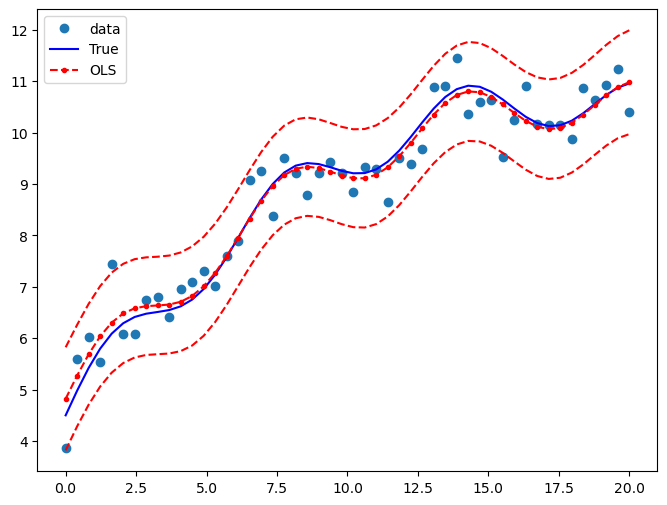

In [13]:
prstd, iv_l, iv_u = wls_prediction_std(res)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

$y$はぐねぐねしているのに最小二乗法で解けている。説明変数の単なる和なので、説明変数がくねくねしていれば被説明変数もそれにしたがってくねくねしている。単に直線の足し算だけではないということだ。

例によって$y$の頻度図を作っておこう。

(array([ 1.,  0.,  5.,  3.,  6.,  2.,  4., 13.,  9.,  7.]),
 array([ 3.86917194,  4.626605  ,  5.38403806,  6.14147112,  6.89890418,
         7.65633724,  8.4137703 ,  9.17120337,  9.92863643, 10.68606949,
        11.44350255]),
 <BarContainer object of 10 artists>)

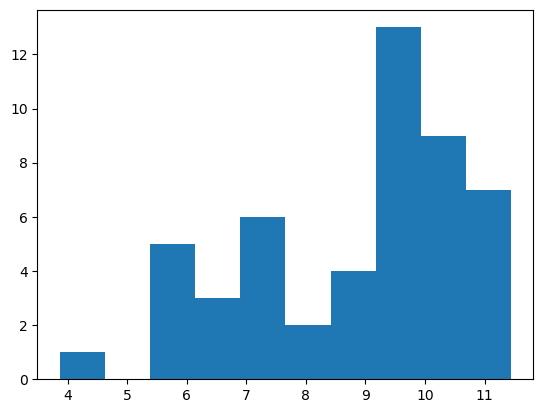

In [14]:
plt.hist(y)

この$y$の頻度図についても足し算になっているということだ。なるほど。

コーシー分布をつかってノイズを作ってみよう。金融の場合はこんなもんだ。


In [15]:
from scipy.stats import cauchy
nsample = 100
x = np.linspace(0, 10, 100)
beta = np.array([1, 0.1])
X = sm.add_constant(x)
y_true=np.dot(X, beta)
e = cauchy.rvs(loc=0,scale=0.1,size=nsample)
y = y_true + e

# Fit and summary:
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     58.68
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           1.33e-11
Time:                        12:03:54   Log-Likelihood:                -33.820
No. Observations:                 100   AIC:                             71.64
Df Residuals:                      98   BIC:                             76.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0505      0.068     15.438      0.0

Cond.No.は変わらないのに$p$値は大きく変わった。切片も回帰係数も再現性が弱くなった。$y$の頻度図を見てみる。

(array([ 1.,  0.,  7., 27., 35., 24.,  4.,  1.,  0.,  1.]),
 array([-0.00964247,  0.33073418,  0.67111084,  1.01148749,  1.35186414,
         1.69224079,  2.03261745,  2.3729941 ,  2.71337075,  3.05374741,
         3.39412406]),
 <BarContainer object of 10 artists>)

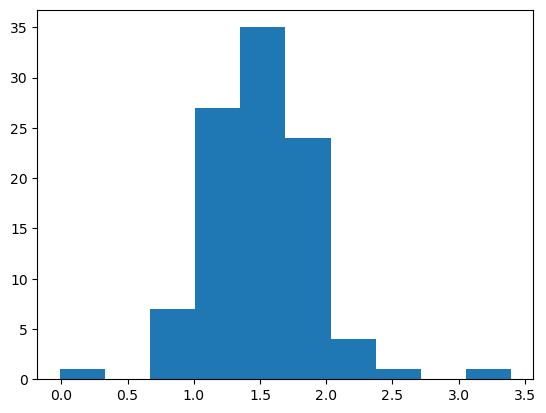

In [16]:
plt.hist(y)

ファットテイルで中心もずれている。実行するたびに大きく異なるノイズが生成されるので、何度も行ってみると面白い。


## データの特性の把握とモデル選択

### ダミー変数

数値ではないデータが得られたときにそれらを数値に変換して回帰分析をするときに、その変換されたデータをダミー変数という。その威力を簡単に見てみよう。

#### 人工的に作ったデータの例

人工データを作ってその有効性を調べてみよう。categoricalは

In [17]:
import string
string_var = [string.ascii_lowercase[0:5],   
              string.ascii_lowercase[5:10],           
              string.ascii_lowercase[10:15],          
              string.ascii_lowercase[15:20],          
              string.ascii_lowercase[20:25]]
string_var

['abcde', 'fghij', 'klmno', 'pqrst', 'uvwxy']

によって生成する。これを5倍に膨らます。

In [18]:
string_var *= 5
string_var

['abcde',
 'fghij',
 'klmno',
 'pqrst',
 'uvwxy',
 'abcde',
 'fghij',
 'klmno',
 'pqrst',
 'uvwxy',
 'abcde',
 'fghij',
 'klmno',
 'pqrst',
 'uvwxy',
 'abcde',
 'fghij',
 'klmno',
 'pqrst',
 'uvwxy',
 'abcde',
 'fghij',
 'klmno',
 'pqrst',
 'uvwxy']

つぎにこの結果をソートする。

In [19]:
string_var = np.asarray(sorted(string_var))
string_var

array(['abcde', 'abcde', 'abcde', 'abcde', 'abcde', 'fghij', 'fghij',
       'fghij', 'fghij', 'fghij', 'klmno', 'klmno', 'klmno', 'klmno',
       'klmno', 'pqrst', 'pqrst', 'pqrst', 'pqrst', 'pqrst', 'uvwxy',
       'uvwxy', 'uvwxy', 'uvwxy', 'uvwxy'], dtype='<U5')

並べ替えた結果からカテゴリカル変数を作る。

In [20]:
design = sm.tools.categorical(string_var, drop=True)
design

C:\Users\hm201\anaconda3\lib\site-packages\statsmodels\tools\tools.py:152: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  warnings.warn(


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [21]:
y= np.floor(np.arange(10,60, step=2)/10)
y

array([1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 4., 4.,
       4., 4., 4., 5., 5., 5., 5., 5.])

いよいよ回帰を行う。

In [22]:
X=design
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.965e+31
Date:                Tue, 20 Jun 2023   Prob (F-statistic):          1.88e-310
Time:                        12:03:54   Log-Likelihood:                 850.32
No. Observations:                  25   AIC:                            -1691.
Df Residuals:                      20   BIC:                            -1685.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000   2.05e-16   4.88e+15      0.0

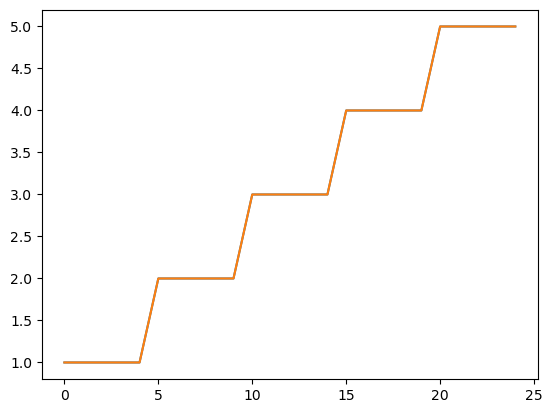

In [23]:
plt.plot(y)
plt.plot(results.fittedvalues)

R-squaredは1となりました。

#### Statsmodelsのサンプル

さらにダミー変数の役割が直感的に理解できるように、statsmodelsのサンプルを見てみよう。

50個の標本を生成する。groupsに0,1,2を設定する。それをもとにダミー変数を生成する。
説明変数xを0から20までの数値を50個に分割して生成する。それに３つのグループの内の最初のgroupsを取り除き加え、かつ定数(切片)を付加する。

$\beta$を1,3,-3,10としてy_trueを生成する。ノイズは標準正規乱数とする。

In [24]:
nsample = 50
groups = np.zeros(nsample, int) # data typeを整数(int)に指定
groups[20:40] = 1
groups[40:] = 2
#dummy = (groups[:,None] == np.unique(groups)).astype(float)
dummy = sm.categorical(groups, drop=True)
x = np.linspace(0, 20, nsample)
# drop reference category
X = np.column_stack((x, dummy[:,1:])) # 2次元配列に変換
X = sm.add_constant(X, prepend=False) #定数は最初の列(True)ではなく、最後の列（False)に加える
beta = [1., 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e

# Inspect the data:最初の５つのデータを確認する。
print(X[:5,:])
print(y_true[:5])
print(y[:5])
print(groups)
print(dummy[:5,:])

[[0.         0.         0.         1.        ]
 [0.40816327 0.         0.         1.        ]
 [0.81632653 0.         0.         1.        ]
 [1.2244898  0.         0.         1.        ]
 [1.63265306 0.         0.         1.        ]]
[10.         10.40816327 10.81632653 11.2244898  11.63265306]
[11.57142354 11.04971112  9.90901776 13.21368752 10.64743016]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


C:\Users\hm201\anaconda3\lib\site-packages\statsmodels\tools\tools.py:152: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  warnings.warn(


２つのダミー変数の影響のある部分と無い部分の3つのグループから構成されるy_trueを可視化する。

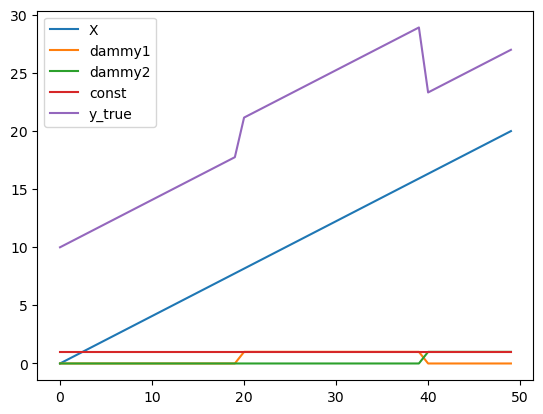

In [25]:
plt.plot(X[:,0],label='X')
plt.plot(X[:,1],label='dammy1')
plt.plot(X[:,2],label='dammy2')
plt.plot(X[:,3],label='const')
plt.plot(y_true,label='y_true')
plt.legend()

$X$と$\beta$の関係が見て取れる。

In [26]:
# Fit and summary:
res2 = sm.OLS(y, X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     401.7
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           5.46e-33
Time:                        12:03:54   Log-Likelihood:                -76.457
No. Observations:                  50   AIC:                             160.9
Df Residuals:                      46   BIC:                             168.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8778      0.076     11.568      0.0

結果は良好であるのでグラフに描いてみよう。ダミー変数の利用により、３つのグループの変数が区別されている。

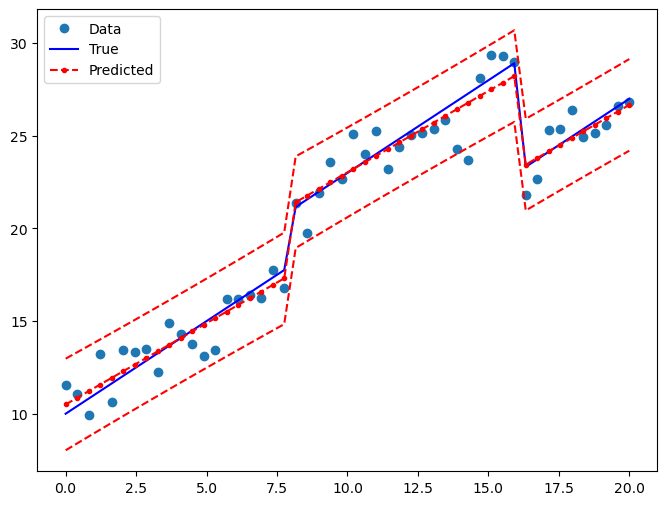

In [28]:
prstd, iv_l, iv_u = wls_prediction_std(res2)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="Data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res2.fittedvalues, 'r--.', label="Predicted")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
legend = ax.legend(loc="best")

# 結合仮説の検定 
適切なモデルの構成、特に説明変数・観測値の選択について議論する。モデル選択の基準とひとつにサマリーレポートにもあるように自由度調整済み決定係数がある。この係数が大きいモデルを採用するという考え方である。しかし、その他にもいくつか基準があるのでそれを見ていこう。

統計的検定について知りたい方は
https://qiita.com/innovation1005/items/00362c2129bfe25fe272
を参照してください。また、統計的検定をマスターするには根気と時間が必要です。焦ることなく、着実にこなすことが必要。

## F検定

線形回帰のサマリーレポートのF検定はすべての回帰係数がゼロであるという仮説を帰無仮説としている。ここでは、その内のダミー変数の回帰係数がゼロだという仮説を検定してみる。これを帰無仮説とする。Rは検定の条件を表している。[0,1,0,0]はx2(ダミー変数)を表していて、[0,0,1,0]はx3(ダミー変数)を表している。ダミー変数の回帰係数がゼロだという帰無仮説は$R \times \beta=0$である。F検定の結果は、3つのグループが同じであるという仮説を非常に強く棄却している。つまり、$\beta_i$たちはゼロではないのだ。また、この検定の仮説は数式を用いて表現することもできる。



In [30]:
R = [[0, 1, 0, 0], [0, 0, 1, 0]]
print(np.array(R))
print(res2.f_test(R))

[[0 1 0 0]
 [0 0 1 0]]
<F test: F=83.01886332761953, p=5.444122942527986e-16, df_denom=46, df_num=2>


数式を用いて帰無仮説を表現する。

In [32]:
# You can also use formula-like syntax to test hypotheses

print(res2.f_test("x2 = x3 = 0"))

<F test: F=83.01886332761954, p=5.4441229425279705e-16, df_denom=46, df_num=2>


もちろん結果は同じである。


## 構成割合の小さなグループの影響

statsmodelsのリファレンスにあるこの例も非常に良い例である。あるグループまたは変数の影響を小さくしてみよう。この問題は仮説検定と密接な関係にある。ここでは前節のF検定と回帰係数のp－値を用いて考えてみよう。

実際のデータを生成する際に$\beta_1=0.3$を小さくし、$\beta_2=-0.0$としてみる。回帰係数を見てみると、$\beta_1$は0.3なので帰無仮説のゼロに近くなる。$\beta_2$はゼロであるので帰無仮説と同じである。この設定でデータを人工的に生成しているので、仮説検定の結果もそうなってほしい。しかし、実際にはそうはならない。まず結果を見てみよう。

In [33]:
beta = [1., 0.3, 0, 10]
y_true = np.dot(X, beta)
y = y_true + e #np.random.normal(size=nsample)
res3 = sm.OLS(y, X).fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     409.4
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           3.60e-33
Time:                        12:08:11   Log-Likelihood:                -76.457
No. Observations:                  50   AIC:                             160.9
Df Residuals:                      46   BIC:                             168.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8778      0.076     11.568      0.0

X2が$\beta_1$、X3が$\beta_2$であるので、どちらもp値は0.1よりも大きい。これでは帰無仮説を棄却できない。期待としては$\beta_1$のp値は0.1または0.05よりも小さく、$\beta_2$のものは0.1よりも大きくあってほしい。したがって、$\beta_1$については期待に応えられていない。

つぎにF検定でみてみよう。サマリーレポートのF検定は1.72e-34と非常に小さい。したがって、3つの回帰変数がゼロであるという帰無仮説は棄却されている。これをチェックしてみよう。

In [34]:
R = [[1, 0, 0, 0],[0, 1, 0, 0], [0, 0, 1, 0]]
print(res3.f_test(R))

<F test: F=409.3896467196412, p=3.5963482014110614e-33, df_denom=46, df_num=3>


結果は同じである。つぎに1つ1つ見ていこう。

In [35]:
R = [[0, 1, 0, 0]]
print(res3.f_test(R))

<F test: F=2.135817650350919, p=0.15069170521787903, df_denom=46, df_num=1>


In [36]:
R = [[0, 0, 1, 0]]
print(res3.f_test(R))

<F test: F=1.8942521071990601, p=0.1753863638501725, df_denom=46, df_num=1>


どちらも回帰係数のｐ値と同じという結果になった。
つぎに$\beta_1$と$\beta_2$についての回帰係数を見てみよう。

In [37]:
R = [[0, 1, 0, 0], [0, 0, 1, 0]]
print(res3.f_test(R))

<F test: F=1.0887406602744474, p=0.34515647079782513, df_denom=46, df_num=2>


そうすると先ほどのF検定の結果とは異なりp値は0.3である程度の大きさをもっている。これでは帰無仮説を棄却できるとは言えない。

さてこの際の表現方法であるが、一方の$\beta$は実際にゼロではなく0.3だ。実際のデータの生成においても帰無仮説は正しくない。ここで、統計学の主義について説明しておこう。統計学の仮説検定では帰無仮説を採択するという結論はないのだ。統計学では真理を明らかにすることが目的ではなく、数学的な誤謬を減らすことにある([仮説検定wiki参照](https://ja.wikipedia.org/wiki/%E4%BB%AE%E8%AA%AC%E6%A4%9C%E5%AE%9A))。したがって、この場合の結論は、棄却するに足る証拠はないとか、棄却するに足るには十分ではない、などの表現を用いる。そして今回は、その表現が実際に正しい。気を付ける必要があるのは実際に帰無仮説が棄却できない場合に、帰無仮説が正しいと思ってしまうことである。これは今回の例のようにかなり微妙なのである。

ここでの問題の原因は仮説検定の本質的な特性にあるのだ。それはつぎのように説明される。帰無仮説を平均値$\mu=50$としよう。図に書くと
![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/077b4c8e-d13c-4ccd-094b-ba89abf19c18.png)
というイメージだ。グレーの部分が棄却域である。実際の分布の$\mu=48$としてみよう。そうすると
![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/d14163cb-d41c-d423-39e9-db6f403afbd1.png)
そうすると棄却域のグレーの分は少し増える。しかし、帰無仮説を棄却したければ、$\mu$をもっとズラせばよいのである。そこで$\mu=56$にしてみよう。
![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/a017d567-7b4e-829f-25a5-eb844a889757.png)
詳しくは[statsmodelsによる統計的仮説検定 入門](https://qiita.com/innovation1005/items/00362c2129bfe25fe272)
を参照してほしい。

## [多重共線性](https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html)

[Longley(1967)](https://www.statsmodels.org/devel/datasets/generated/longley.html)のデータは高い多重共線性をもつことで知られている。これは非常に高い相関をもつデータであることを示している。回帰係数を計算する際にそれらを不安定にする原因となる。したがって、データが多重共線性をもてば、安定性を得るためにモデルの特性を若干変える必要がある。

観測値の数 - 6

変数名と内容::

        TOTEMP - 総雇用者数(endog)
        GNPDEFL - GNP デフレーター
        GNP - GNP
        UNEMP - 非雇用者数
        ARMED - 軍隊の規模
        POP - 人口
        YEAR - 西暦 (1947 - 1962)



In [38]:
from statsmodels.datasets.longley import load_pandas
y = load_pandas().endog
X = load_pandas().exog
X = sm.add_constant(X)

# Fit and summary:

ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           4.98e-10
Time:                        12:10:30   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.482e+06    8.9e+05     -3.911      0.0

C:\Users\hm201\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


メッセージは条件数から多重共線性を警告している。

## 条件数(Condition number)

多重共線性を判断する１つの方法に条件数があります。グリーンによると２０を超えると多重共線性を疑う必要があります。

条件数（は、問題のコンピュータでの数値解析しやすさの尺度であり、その問題がどれだけ数値解析に適しているかを表す。条件数が小さい問題は「良条件 (well-conditioned)」であり、条件数が大きい問題は「悪条件 (ill-conditioned)」である(wiki)。

In [39]:
# step 1
norm_x = X.values
for i, name in enumerate(X):
    if name == "const":
        continue
    norm_x[:,i] = X[name]/np.linalg.norm(X[name])
norm_xtx = np.dot(norm_x.T,norm_x)
# step 2
eigs = np.linalg.eigvals(norm_xtx)
condition_number = np.sqrt(eigs.max() / eigs.min())
print(condition_number)

56240.87078418103


条件数に問題があれば、相関行列を別のものにすればよいのであるから、
条件数が大きければ説明変数を1つ落とすことで、大きな改善がみられることがある。モデルの特性を若干変えるのである。

In [41]:
# 説明変数の削減
ols_results2 = sm.OLS(y.iloc[:14], X.iloc[:14]).fit()
print("Percentage change %4.2f%%\n"*7 % tuple
      ([i for i in (ols_results2.params - ols_results.params)/ols_results.params*100]))

Percentage change 4.55%
Percentage change -2228.01%
Percentage change 154304695.31%
Percentage change 1366329.02%
Percentage change 1112549.36%
Percentage change 92708715.91%
Percentage change 817944.26%



## 観測値の削除

### DFBETAS

DFBETASを見る方法もある。これはそれぞれの回帰係数がどの程度変わるかを測定する標準的な方法である。 

統計では、データセットから特定のデータを削除することによって計算結果が著しく変化する場合、そのデータを「影響力のある観測点」という。特に、回帰分析では、あるデータ点を除くことでパラメーター推定に大きな影響を与えるものを影響力のあるデータポイントという。

一般に絶対値が$2/ \sqrt(N)$よりも大きいと影響のある観測値とみなせる。

In [42]:
2./len(X)**.5

0.5

In [43]:
infl = ols_results.get_influence()
print(infl.summary_frame().filter(regex="dfb"))

    dfb_const  dfb_GNPDEFL       dfb_GNP     dfb_UNEMP     dfb_ARMED  \
0   -0.016406  -169.822675  1.673981e+06  54490.318088  51447.824036   
1   -0.020608  -187.251727  1.829990e+06  54495.312977  52659.808664   
2   -0.008382   -65.417834  1.587601e+06  52002.330476  49078.352378   
3    0.018093   288.503914  1.155359e+06  56211.331922  60350.723082   
4    1.871260  -171.109595  4.498197e+06  82532.785818  71034.429294   
5   -0.321373  -104.123822  1.398891e+06  52559.760056  47486.527649   
6    0.315945  -169.413317  2.364827e+06  59754.651394  50371.817827   
7    0.015816   -69.343793  1.641243e+06  51849.056936  48628.749338   
8   -0.004019   -86.903523  1.649443e+06  52023.265116  49114.178265   
9   -1.018242  -201.315802  1.371257e+06  56432.027292  53997.742487   
10   0.030947   -78.359439  1.658753e+06  52254.848135  49341.055289   
11   0.005987  -100.926843  1.662425e+06  51744.606934  48968.560299   
12  -0.135883   -32.093127  1.245487e+06  50203.467593  51148.37

C:\Users\hm201\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:696: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
C:\Users\hm201\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:737: RuntimeWarning: invalid value encountered in sqrt
  dffits_ = self.resid_studentized_internal * np.sqrt(hii / (1 - hii))
C:\Users\hm201\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:766: RuntimeWarning: invalid value encountered in sqrt
  dffits_ = self.resid_studentized_external * np.sqrt(hii / (1 - hii))


## 例１． [Spector and Mazzeo (1980)](https://www.statsmodels.org/stable/datasets/generated/spector.html) - 個人向け教育プログラム(PSI)の効果

個人向け教育プログラムによる効果の実データ

データの詳細：32行、4列

|変数名|説明|
|:-:|:-:|
|Grade | 生徒の評価点(GPA)が改善したかどうかの2値データ。１が改善。|
|TUCE| 経済のテストの評価点
|GPA| 生徒の評価点(GPA)の平均
|PSI|プログラムへの参加の可否

In [45]:
# Load modules and data
spector_data = sm.datasets.spector.load()
spector_data.endog[:5],spector_data.exog[:5]

(0    0.0
 1    0.0
 2    0.0
 3    0.0
 4    1.0
 Name: GRADE, dtype: float64,
     GPA  TUCE  PSI
 0  2.66  20.0  0.0
 1  2.89  22.0  0.0
 2  3.28  24.0  0.0
 3  2.92  12.0  0.0
 4  4.00  21.0  0.0)

まずはstatsmodelsのリファレンスのサンプルを動かす。

In [47]:
X = sm.add_constant(spector_data.exog, prepend=False)
# Fit and summarize OLS model
mod = sm.OLS(spector_data.endog, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  GRADE   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     6.646
Date:                Tue, 20 Jun 2023   Prob (F-statistic):            0.00157
Time:                        12:20:12   Log-Likelihood:                -12.978
No. Observations:                  32   AIC:                             33.96
Df Residuals:                      28   BIC:                             39.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GPA            0.4639      0.162      2.864      0.0

条件数が多いので、$p$値の高い評価点(GPA)を除く。

In [57]:
X=spector_data.exog.iloc[:,1:]
X = sm.add_constant(X, prepend=False)
y=spector_data.endog
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  GRADE   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     4.700
Date:                Tue, 20 Jun 2023   Prob (F-statistic):             0.0171
Time:                        12:25:49   Log-Likelihood:                -17.089
No. Observations:                  32   AIC:                             40.18
Df Residuals:                      29   BIC:                             44.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TUCE           0.0320      0.020      1.593      0.1

結果が落ち着いてきた。今度は経済の評価点を除く。

In [59]:
X = sm.add_constant(spector_data.exog.iloc[:,2], prepend=False)
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  GRADE   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     6.529
Date:                Tue, 20 Jun 2023   Prob (F-statistic):             0.0159
Time:                        12:28:13   Log-Likelihood:                -18.431
No. Observations:                  32   AIC:                             40.86
Df Residuals:                      30   BIC:                             43.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PSI            0.4048      0.158      2.555      0.0

切片は要らないかもしれない。

In [60]:
X = spector_data.exog.iloc[:,2]
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  GRADE   R-squared (uncentered):                   0.416
Model:                            OLS   Adj. R-squared (uncentered):              0.397
Method:                 Least Squares   F-statistic:                              22.04
Date:                Tue, 20 Jun 2023   Prob (F-statistic):                    5.14e-05
Time:                        12:31:04   Log-Likelihood:                         -19.726
No. Observations:                  32   AIC:                                      41.45
Df Residuals:                      31   BIC:                                      42.92
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

結果は大分すっきりした。プログラムに参加すると成績は上がりそうだ。実際にデータで見てみよう。

In [62]:
spector_data.endog[spector_data.exog.iloc[:,2]==0].sum(),spector_data.endog[spector_data.exog.iloc[:,2]==1].sum()

(3.0, 8.0)

プログラムに参加しなくて成績が改善した人が3人、参加した人で改善した人が8人であった。プログラムに参加した人の数は

In [66]:
spector_data.exog[spector_data.exog.iloc[:,2]==1].iloc[:,2].sum()

14.0

14人であるので、成績が改善する確率は5割を超える。

Gradeは改善、非改善を1,0の2値で表している。こちらはダミー変数とは言わないが、PSIはプログラムの参加、不参加を1,0の2値で表しているので、これはダミー変数と見ることができる。結果をグラフにしてみよう。

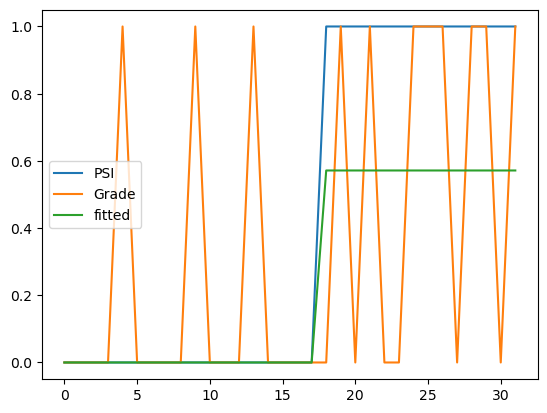

In [68]:
X=spector_data.exog.iloc[:,2]
#X = sm.add_constant(X, prepend=False)
y=spector_data.endog
mod = sm.OLS(y, X)
res = mod.fit()
plt.plot(X,label='PSI')
plt.plot(y,label='Grade')
plt.plot(res.fittedvalues,label='fitted')
plt.legend()

Spector and Mazzeo (1980)は別のサンプルでも使われている。

- [Maximum Likelihood Estimation (Generic models)](https://www.statsmodels.org/dev/examples/notebooks/generated/generic_mle.html)
- [Regression with Discrete Dependent Variable](https://www.statsmodels.org/stable/examples/notebooks/generated/discrete_choice_overview.html)

# 推定の問題

データの特徴が明確に定められることはまれであるので、母集団回帰関数を得られることはまれであり、標本回帰関数を推定する必要がある。その推定値が最良線形不偏推定量であるためには
1) パラメータに対して線形
2) x(独立変数、説明変数)は確率変数ではなく固定値、または確率変数の場合は誤差項と独立
3) 誤差の平均値はゼロ
4) 誤差の分散は一定
5) 誤差の間の共分散はゼロ
6) 観測値の数はパラメータの数よりも多い
7) xには外れ値などが含まれない
という条件が課される。

これに誤差が正規分布にしたがうという条件を加えると推定値はさまざな[統計的仮説検定](https://qiita.com/innovation1005/items/00362c2129bfe25fe272)に耐えうるものになる。



# [Prediction (in sample/out of sample)](https://github.com/statsmodels/statsmodels/blob/main/examples/notebooks/predict.ipynb)

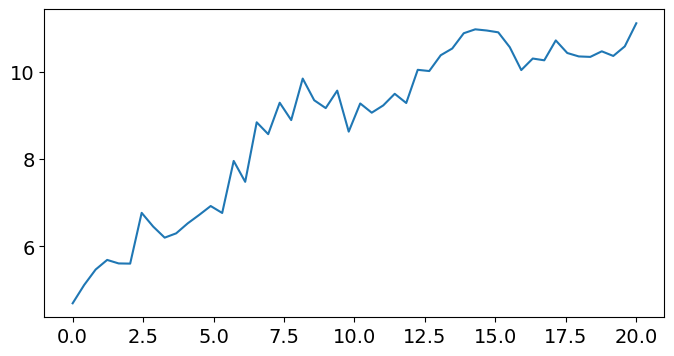

In [69]:
plt.rc("figure", figsize=(8, 4))
plt.rc("font", size=14)

# 人工データの生成
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)
plt.plot(x1,y)

In [70]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     686.1
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           3.53e-38
Time:                        12:43:10   Log-Likelihood:                -7.0985
No. Observations:                  50   AIC:                             22.20
Df Residuals:                      46   BIC:                             29.85
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9211      0.099     49.657      0.0

[ 4.42451819  4.89952117  5.33635832  5.70866488  5.99959101  6.20457014
  6.33206925  6.4021978   6.44340376  6.48779971  6.56588683  6.70154366
  6.90810288  7.18616083  7.52347954  7.89699733  8.27661785  8.6301548
  8.92862002  9.15098622  9.28764163  9.34196927  9.32979107  9.27676838
  9.2141859   9.17381169  9.18267775  9.25863877  9.40743861  9.62176665
  9.88245886 10.16164643 10.42733452 10.64865892 10.80095695 10.8698195
 10.85345836 10.76300003 10.62065771 10.45608167 10.30148783 10.1863648
 10.13262891 10.15102349 10.23935375 10.38284736 10.55658153 10.72957772
 10.86989136 10.94986025]


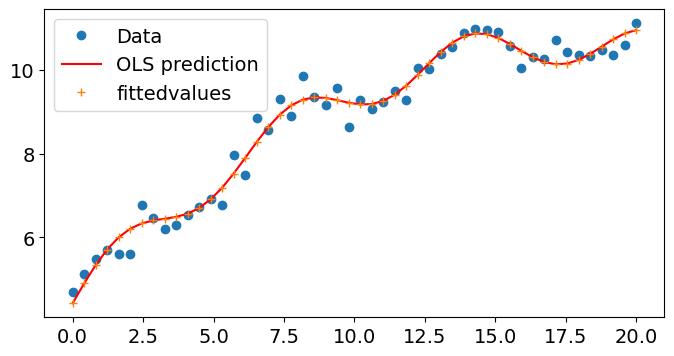

In [71]:
# in sample prediction
ypred = olsres.predict(X)
print(ypred)
plt.plot(x1, y, "o", label="Data")
plt.plot(x1, ypred, "r", label="OLS prediction")
plt.plot(x1,olsres.fittedvalues,"+", label="fittedvalues")
plt.legend()

In [72]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.93894959 10.80004105 10.55210606 10.23837809  9.91576759  9.64092835
  9.45638666  9.38012937  9.40120013  9.48238184]


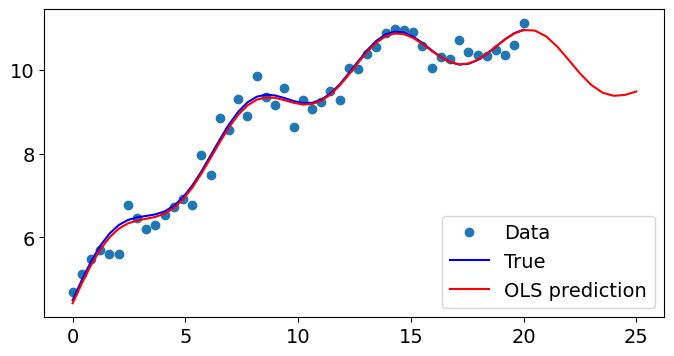

In [73]:
fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

In [75]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

res.params

Intercept           4.921063
x1                  0.502802
np.sin(x1)          0.483765
I((x1 - 5) ** 2)   -0.019862
dtype: float64

In [76]:
res.predict(exog=dict(x1=x1n))

0    10.938950
1    10.800041
2    10.552106
3    10.238378
4     9.915768
5     9.640928
6     9.456387
7     9.380129
8     9.401200
9     9.482382
dtype: float64

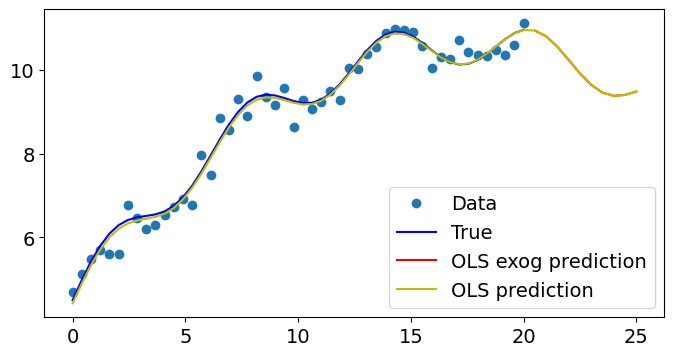

In [74]:
fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(x1n, res.predict(exog=dict(x1=x1n)), "r", label="OLS exog prediction")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "y", label="OLS prediction")
ax.legend(loc="best")

In [ ]:
<A HREF="http://www.tradersshop.com/bin/showprod?c=9784775991855
">Python3ではじめるシステムトレード【第2版】環境構築と売買戦略</A>

<A HREF="http://www.tradersshop.com/bin/showprod?c=9784775991855">
     <IMG SRC="http://www.tradersshop.com/images/prod/9784775991855.jpg"BORDER=1 WIDTH=70 HEIGHT=100  </A>

「画像をクリックしていただくとpanrollingのホームページから書籍を購入していただけます。